## **Performance Comparison** for backgroun substraction with OpenCV

This code demonstrates background subtraction using different algorithms provided by OpenCV. It captures a video from a specified source, applies background subtraction, and displays the original frame along with the resulting mask.

Pixel counts: how many pixels are different from 0? This can give an idea about the algorithm classification. If there is no moviment, then the pixel value is 0 (black color). Pixel values different than 0 (1 or 255) means the algorithm is identifying moviment. More white pixels mean the algorithm is more precise or sensible in terms of moviment.

- What is the most sensible algorithm?
- Which algorithm is more responsable to light?
- Which algorithm is the most noisy?

**Step 1:** Importing Libraries

In [1]:
import cv2 # compute vision
import sys #system-specific parameters and functions
from random import randint # generates random integers

**Step 2:** Setting Constants

In [2]:
TEXTCOLOR = (randint(0, 255), randint(0, 255), randint(0, 255))
BORDERCOLOR = (randint(0, 255), randint(0, 255), randint(0, 255))
FONT = cv2.FONT_HERSHEY_SIMPLEX
VIDEO_SOURCE = "videos/people.mp4"

**Step 3:** Background Subtraction Algorithm Types

In [3]:
BGS_TYPES = ["GMG", "MOG", "MOG2", "KNN", "CNT"]
BGS_TYPE = BGS_TYPES[3] # set for KNN

In [1]:
# GMG - 39
# MOG - 28
# MOG2 - 17
# KNN - 16
# CNT - 14

**Step 4:** Background Subtraction Function

In [4]:
def getBGSubtractor(BGS_TYPE):
    if BGS_TYPE == "GMG":
        return cv2.bgsegm.createBackgroundSubtractorGMG(initializationFrames=10)
    if BGS_TYPE == "MOG":
        return cv2.bgsegm.createBackgroundSubtractorMOG()
    if BGS_TYPE == "MOG2":
        return cv2.createBackgroundSubtractorMOG2()
    if BGS_TYPE == "KNN":
        return cv2.createBackgroundSubtractorKNN()
    if BGS_TYPE == "CNT":
        return cv2.bgsegm.createBackgroundSubtractorCNT()
    print("Unknown createBackgroundSubtractor type")
    sys.exit(1)

**Step 5:** Video Capture and Background Subtraction Initialization and Main Function

In [5]:
cap = cv2.VideoCapture(VIDEO_SOURCE)
bg_subtractor = getBGSubtractor(BGS_TYPE)
e1 = cv2.getTickCount()

Main function:
- Reads frames from the video capture;
- Applies background subtraction to obtain a binary mask (bg_mask);
- Performs a bitwise AND operation to highlight foreground objects in the original frame (res);
- Displays the original frame and the resulting mask in separate windows;
- Continues processing until the 'q' key is pressed or a certain number of frames (250) is reached;
- Prints the elapsed time for the execution.

In [6]:
def main():
    frame_number = -1
    while (cap.isOpened):
        ok, frame = cap.read()

        if not ok:
          print('Erro')
          break

        frame_number += 1

        bg_mask = bg_subtractor.apply(frame)
        res = cv2.bitwise_and(frame, frame, mask=bg_mask)

        cv2.imshow('Frame', frame)
        cv2.imshow('Mask', res)

        if cv2.waitKey(1) & 0xFF == ord("q") or frame_number > 250:
            break

    e2 = cv2.getTickCount()
    t = (e2 - e1) / cv2.getTickFrequency()
    print(t)

In [ ]:
main()

## **Results:**

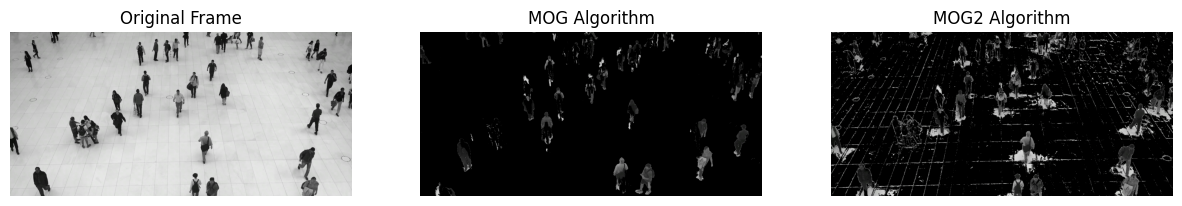

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the images 
img = mpimg.imread("images/original-people.png")
img_mog = mpimg.imread("images/people-mog.png")
img_mog2 = mpimg.imread("images/people-mog2.png")

# Set the figure size
fig = plt.figure(figsize=(15, 5))

# Display the images side by side
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original Frame')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_mog)
plt.title('MOG Algorithm')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_mog2)
plt.title('MOG2 Algorithm')
plt.axis('off')
plt.show()

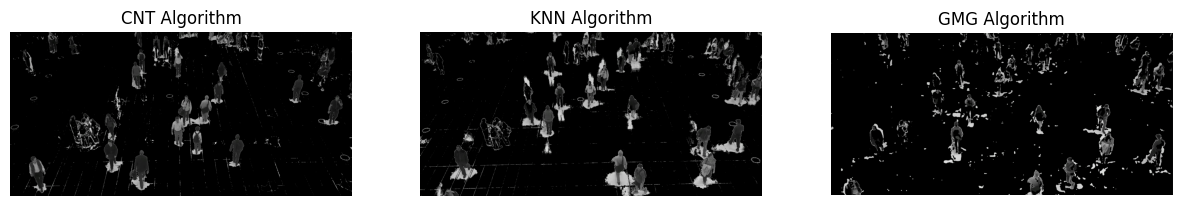

In [7]:
# Load the images 
img_cnt = mpimg.imread("images/people-cnt.png")
img_knn = mpimg.imread("images/people-knn.png")
img_gmg = mpimg.imread("images/people-gmg.png")

# Set the figure size
fig = plt.figure(figsize=(15, 5))

# Display the images side by side
plt.subplot(1, 3, 1)
plt.imshow(img_cnt)
plt.title('CNT Algorithm')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_knn)
plt.title('KNN Algorithm')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_gmg)
plt.title('GMG Algorithm')
plt.axis('off')
plt.show()